# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import datetime
import pandas as pd
from pandas import read_csv
#from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

#importing wordcloud for visual
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

# **Load Datasets**

In [ ]:
# Load the tweets dataset
file_path = '/content/covid19_tweets_sentiment_us_states_10000_rows.csv'
tweets_data = pd.read_csv(file_path)

data_path = '/content/21-22 Covid Cases&Deaths.csv'
series = pd.read_csv(data_path)

#Load Cases dataset
usa_deaths = pd.read_csv('/content/covid_deaths_usafacts.csv')
#Load Deaths dataset
usa_cases = pd.read_csv('/content/covid_confirmed_usafacts.csv')
# Load vaccination dataset
vacc_df = pd.read_csv('/content/us_state_vaccinations.csv')

In [ ]:
usa_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [ ]:
usa_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [ ]:
vacc_df.head(4)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN


In [ ]:
tweets_data.head()

,tweet_id,username,tweet,location,hashtags,retweet_count,favorite_count,user_followers,user_following,sentiment,deaths,covid_phase,date
0,3298d4e9-7c1e-438b-884e-f73e8ad3bb03,smithjohn,Vaccine hesitancy among the population Mission...,Tennessee,#covid19,152,623,5563,4146,neutral,1878,Lockdown implementation,19/06/2020
1,b95257cc-d698-4218-808e-3c2b55ca541e,luisvega,Getting vaccinated to protect ourselves and ot...,Colorado,#vaccine,487,660,6574,1899,neutral,1348,Post-lockdown recovery,25/10/2020
2,5223d959-486e-4636-8681-ddb46ef30138,william81,Long COVID affecting many people Kind low gard...,North Dakota,#quarantine,256,226,5377,1367,negative,218,Vaccine rollout,23/12/2021
3,bf288db2-cb53-4275-8465-3c142a4942c2,teresawashington,Lockdown measures to curb the pandemic Spring ...,Idaho,#vaccine,891,765,3247,972,neutral,703,Lockdown implementation,02/06/2020
4,61aef52a-2993-4c80-adaa-19dbc1568e8b,patricia06,Impact of COVID-19 on the healthcare system Sc...,Oklahoma,#quarantine,545,790,2266,790,neutral,726,Vaccine development,30/03/2021


# **Data Processing**

The code below is used to remove null values and unnecessary columns from the data frame for easy analysis, as well as reshape the cases and deaths data frame into long format, converting the column names (dates) into a single column called 'Date' and moving the values under each date column into a single column called Cases & Deaths.

In [ ]:
# drop null values
vacc_df = vacc_df.dropna()
# Drop unnecessary columns, keeping only county and date columns
usa_deaths_clean = usa_deaths.drop(['countyFIPS', 'StateFIPS'], axis =1)
usa_cases_clean = usa_cases.drop(['countyFIPS', 'StateFIPS'], axis =1)
vacc_df = vacc_df.drop(columns=['people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'distributed_per_hundred', 'daily_vaccinations_raw', 'daily_vaccinations_per_million','daily_vaccinations','share_doses_used','total_boosters_per_hundred'], axis=1)
vacc_df = vacc_df.rename(columns={'location': 'State'})
# Melt the DataFrame to make the dates and deaths long-format
usa_deaths_long = usa_deaths_clean.melt(id_vars=['County Name', 'State'],
                                            var_name='Date',
                                            value_name='Deaths')
usa_cases_long = usa_cases_clean.melt(id_vars=['County Name', 'State'],
                                            var_name='Date',
                                            value_name='Cases')

In [ ]:
usa_deaths_long.head(4)

,County Name,State,Date,Deaths
0,Statewide Unallocated,AL,2020-01-22,0
1,Autauga County,AL,2020-01-22,0
2,Baldwin County,AL,2020-01-22,0
3,Barbour County,AL,2020-01-22,0


The Code converts the date column into datetime format YYYY-MM-DD and extracting the month and year freom the date for the monthly- yearly analysis.

In [ ]:
# Convert the 'Date' column to datetime
usa_deaths_long['Date'] = pd.to_datetime(usa_deaths_long['Date'], format="%Y-%m-%d")
usa_cases_long['Date'] = pd.to_datetime(usa_cases_long['Date'], format="%Y-%m-%d")
vacc_df['date'] = pd.to_datetime(vacc_df['date'], format="%Y-%m-%d")
# Extract the year from the 'Date' column
usa_deaths_long['year'] = usa_deaths_long['Date'].dt.year
usa_deaths_long['month'] = usa_deaths_long['Date'].dt.month
usa_cases_long['year'] = usa_cases_long['Date'].dt.year
usa_cases_long['month'] = usa_cases_long['Date'].dt.month
vacc_df['year'] = vacc_df['date'].dt.year
vacc_df['month'] = vacc_df['date'].dt.month

Monthly aggregation of data using State Year and month for all the three datasets.

In [ ]:
#monthly aggregation
deaths_monthly = usa_deaths_long.groupby(['State', 'year', 'month'], as_index=False).agg({'Deaths': 'sum'})
cases_monthly = usa_cases_long.groupby(['State', 'year','month'], as_index=False).agg({'Cases': 'sum'})
vacc_monthly = vacc_df.groupby(['State', 'year', 'month'], as_index=False).agg({'total_vaccinations': 'sum'})

Filtering only 2021-2022 data that is column in all three datasets

In [ ]:
#filtering to get 2021 -2022 data
deaths_monthly = deaths_monthly[deaths_monthly['year'].isin([2021, 2022])]
cases_monthly = cases_monthly[cases_monthly['year'].isin([2021, 2022])]
vacc_monthly = vacc_monthly[vacc_monthly['year'].isin([2021, 2022])]

In [ ]:
deaths_monthly.head(4)

,State,year,month,Deaths
12,AK,2021,1,8371
13,AK,2021,2,8234
14,AK,2021,3,9750
15,AK,2021,4,9927


In [ ]:
cases_monthly.head(4)

,State,year,month,Cases
12,AK,2021,1,1568946
13,AK,2021,2,1561458
14,AK,2021,3,1861151
15,AK,2021,4,1944823


In [ ]:
merged_df = pd.merge(deaths_monthly,cases_monthly, on=['year','month','State'], how='inner')
merged_df.head()
# merged_df.to_csv('21-22 Covid Cases&Deaths.csv', index=False)
# from google.colab import files
# files.download('21-22 Covid Cases&Deaths.csv')

,State,year,month,Deaths,Cases
0,AK,2021,1,8371,1568946
1,AK,2021,2,8234,1561458
2,AK,2021,3,9750,1861151
3,AK,2021,4,9927,1944823
4,AK,2021,5,10990,2112427


# Part 1 - **EDA**

This code calculates the per capita COVID-19 cases and deaths for Michigan and the entire USA on a monthly basis. It groups the data by year and month, sums the total cases or deaths for each group, and then divides these totals by approximate populations (10 million for Michigan, 334 million for the USA) to compute per capita values. Additionally, it creates a new column Year-Month to represent the time period in a concise format.

In [ ]:
#calculating per capita Cases
MI_Cases_df = merged_df[merged_df['State'] == 'MI'].groupby(['year','month']).Cases.sum().reset_index()
USA_Cases_df = merged_df.groupby(['year', 'month']).Cases.sum().reset_index()
# Approximate population of Michigan in millions
michigan_population = 10
# Approximate population of USA in millions
usa_population = 334
MI_Cases_df['Cases_per_capita'] = MI_Cases_df['Cases'] / michigan_population
USA_Cases_df['Cases_per_capita'] = USA_Cases_df['Cases'] / usa_population
USA_Cases_df['Year-Month'] = USA_Cases_df['year'].astype(str) + '-M' + USA_Cases_df['month'].astype(str)
MI_Cases_df['Year-Month'] = MI_Cases_df['year'].astype(str) + '-M' + MI_Cases_df['month'].astype(str)

#calculating per capita Deaths
MI_Deaths_df = merged_df[merged_df['State'] == 'MI'].groupby(['State','year','month']).Deaths.sum().reset_index()
USA_Deaths_df = merged_df.groupby(['year', 'month']).Deaths.sum().reset_index()
# Approximate population of Michigan in millions
michigan_population = 10
# Approximate population of USA in millions
usa_population = 334
MI_Deaths_df['Deaths_per_capita'] = MI_Deaths_df['Deaths'] / michigan_population
USA_Deaths_df['Deaths_per_capita'] = USA_Deaths_df['Deaths'] / usa_population
USA_Deaths_df['Year-Month'] = USA_Deaths_df['year'].astype(str) + '-M' + USA_Deaths_df['month'].astype(str)
MI_Deaths_df['Year-Month'] = MI_Deaths_df['year'].astype(str) + '-M' + MI_Deaths_df['month'].astype(str)

1) Cases MI Vs USA

This code merges the per capita COVID-19 cases data for Michigan and the USA into a single DataFrame (combined_df) and creates a line chart using Plotly Express. The chart visualizes the average monthly COVID-19 cases per capita for Michigan and the USA, with separate lines for each region and markers for data points.

Trend Analysis: Case rates for Michigan and the USA align closely until late 2021, after which Michigan starts to lag slightly behind the national trend.

Spike in Cases: The late 2021 and early 2022 spikes are associated with the emergence of the Omicron variant, which was more transmissible but less lethal than previous strains.

Drop in Cases: The decrease in mid-2022 is likely due to widespread immunity (vaccination and prior infections) and seasonality factors.

In [ ]:
#merging Michigan and USA data into a single DataFrame
MI_Cases_df['Region'] = 'Michigan'
USA_Cases_df['Region'] = 'USA'
combined_df = pd.concat([MI_Cases_df[['Year-Month', 'Cases_per_capita', 'Region']],
                         USA_Cases_df[['Year-Month', 'Cases_per_capita', 'Region']]])

#Plotly Express line chart
fig = px.line(
    combined_df,
    x='Year-Month',
    y='Cases_per_capita',
    color='Region',
    markers=True,
    title='Average Monthly COVID-19 Cases per Capita: Michigan vs. USA (2021-2022)',
    labels={'Cases_per_capita': 'Average Monthly Cases per Capita (millions)',
            'Year-Month': 'Year-Month'}
)

fig.update_layout(
    xaxis=dict(
        tickangle=45
    ),
    legend=dict(
        title='Region',
        x=0.05,
        y=0.95,
        bordercolor="Black",
        borderwidth=1
    ),
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
)

fig.show()

2) Cases across all states

This code creates a heatmap to visualize the monthly total COVID-19 cases across all U.S. states. The data is first transformed into a pivot table with states as rows, year-month combinations as columns, and the sum of cases as values, which is then plotted using the seaborn heatmap function.

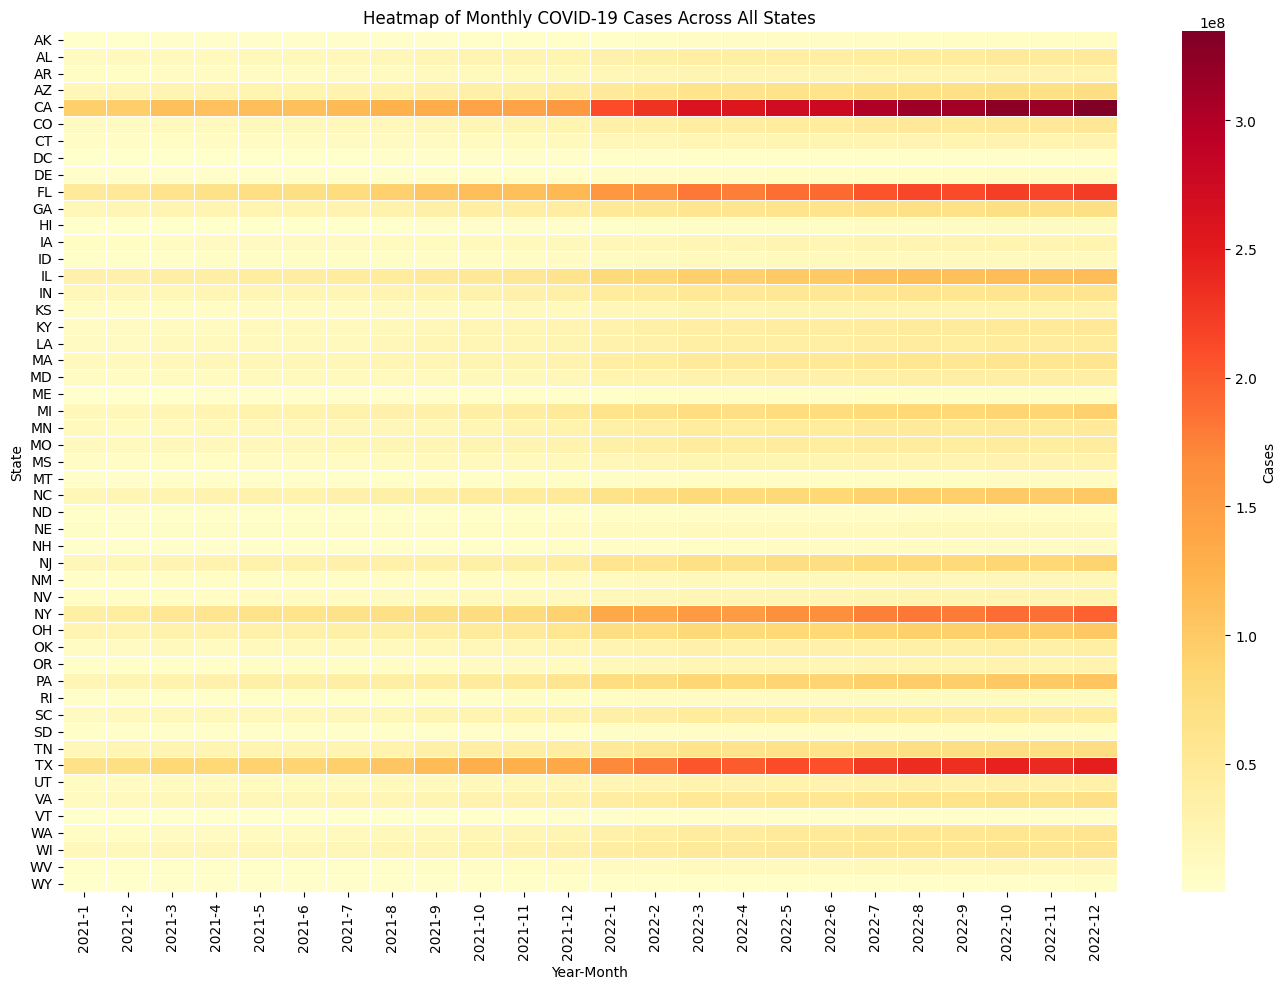

In [ ]:
heatmap_data = merged_df.pivot_table(index='State', columns=['year', 'month'], values='Cases', aggfunc='sum')

# Plotting heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Cases'})
plt.title('Heatmap of Monthly COVID-19 Cases Across All States')
plt.xlabel('Year-Month')
plt.ylabel('State')
plt.tight_layout()
plt.show()

3) Daths MI Vs USA

This code merges the per capita COVID-19 cases data for Michigan and the USA into a single DataFrame (combined_df) and creates a line chart using Plotly Express. The chart visualizes the average monthly COVID-19 cases per capita for Michigan and the USA, with separate lines for each region and markers for data points.

Trend Analysis: The death rates in Michigan remain consistently higher than the national average throughout 2021–2022. There is a notable increase in deaths around late 2021 (October–December) for both Michigan and the USA.

Spike in Deaths: The late 2021 spike corresponds to the Delta variant wave, which was highly transmissible and caused severe outcomes, particularly among unvaccinated populations.

Drop in Deaths: Following early 2022, death rates begin to stabilize, likely due to increased vaccination rates, booster campaigns, and improved treatments such as antivirals.

In [ ]:
#merging Michigan and USA data into a single DataFrame
MI_Deaths_df['Region'] = 'Michigan'
USA_Deaths_df['Region'] = 'USA'
combined_df = pd.concat([MI_Deaths_df[['Year-Month', 'Deaths_per_capita', 'Region']],
                         USA_Deaths_df[['Year-Month', 'Deaths_per_capita', 'Region']]])

#Plotly Express line chart
fig = px.line(
    combined_df,
    x='Year-Month',
    y='Deaths_per_capita',
    color='Region',
    markers=True,
    title='Average Monthly COVID-19 Deaths per Capita: Michigan vs. USA (2021-2022)',
    labels={'Deaths_per_capita': 'Average Monthly Deaths per Capita (millions)',
            'Year-Month': 'Year-Month'}
)

fig.update_layout(
    xaxis=dict(
        tickangle=45
    ),
    legend=dict(
        title='Region',
        x=0.05,
        y=0.95,
        bordercolor="Black",
        borderwidth=1
    ),
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
)

fig.show()

4) Deaths across all states

This code creates a heatmap to visualize the monthly total COVID-19 deaths across all U.S. states. The data is first transformed into a pivot table with states as rows, year-month combinations as columns, and the sum of deaths as values, which is then plotted using the seaborn heatmap function.

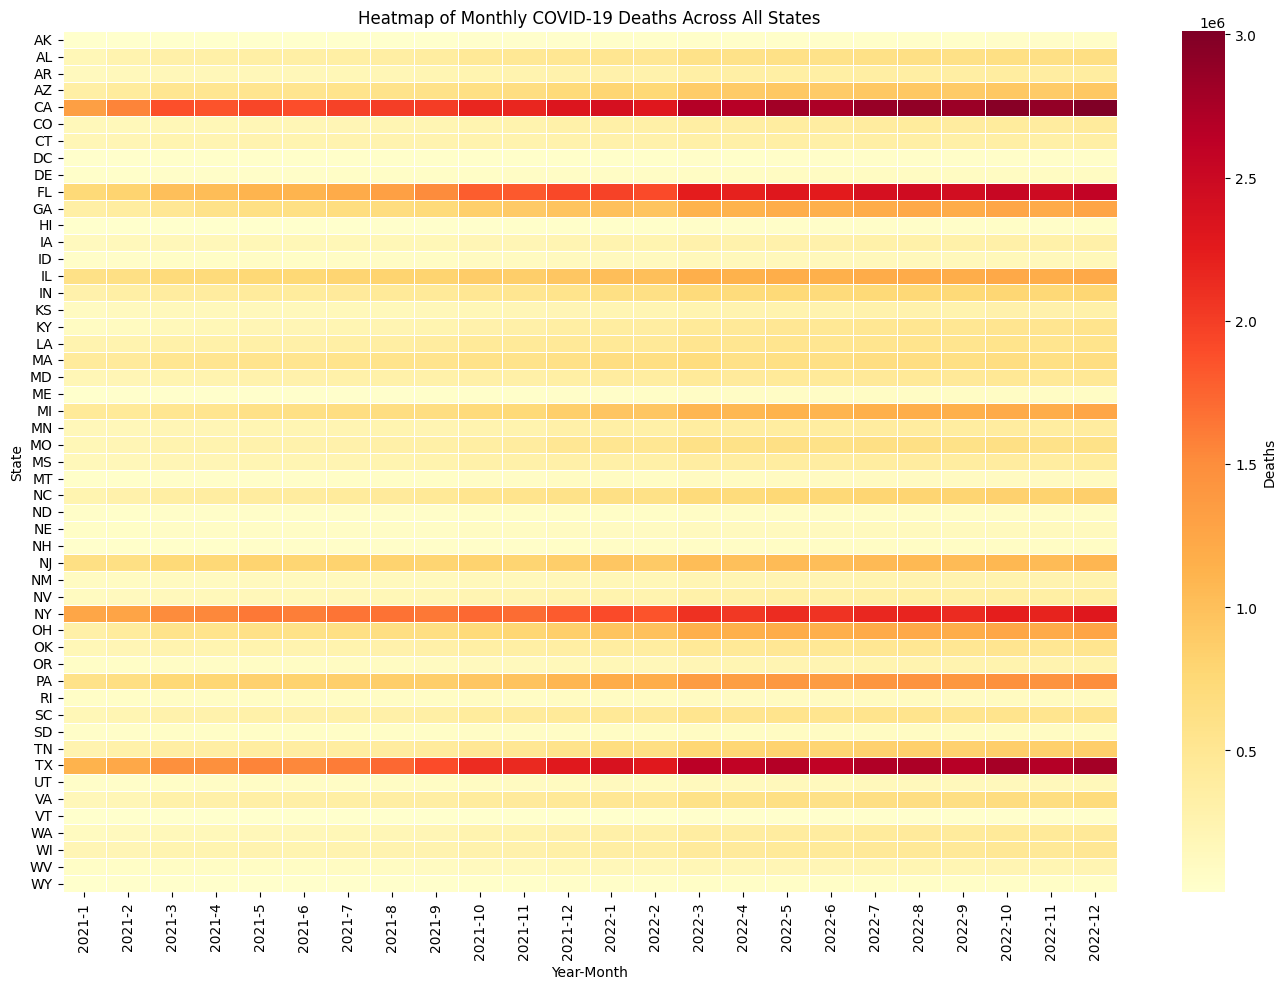

In [ ]:
heatmap_data = merged_df.pivot_table(index='State', columns=['year', 'month'], values='Deaths', aggfunc='sum')
# Plotting heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Deaths'})
plt.title('Heatmap of Monthly COVID-19 Deaths Across All States')
plt.xlabel('Year-Month')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# **Cases-Deaths Comparison:**
5) Ratio by state



This code calculates the deaths-to-cases ratio for each state by dividing the total deaths by the total cases in the dataset and groups the data by state to compute the average ratio. A bar chart is then plotted to visualize this ratio for each state, showing variations in mortality relative to reported cases.

States like Florida and Georgia exhibit higher ratios, potentially due to older populations and healthcare system strain during surges.
States like Vermont and Hawaii have lower ratios, which may be attributed to better public health measures, higher vaccination rates, and younger populations.



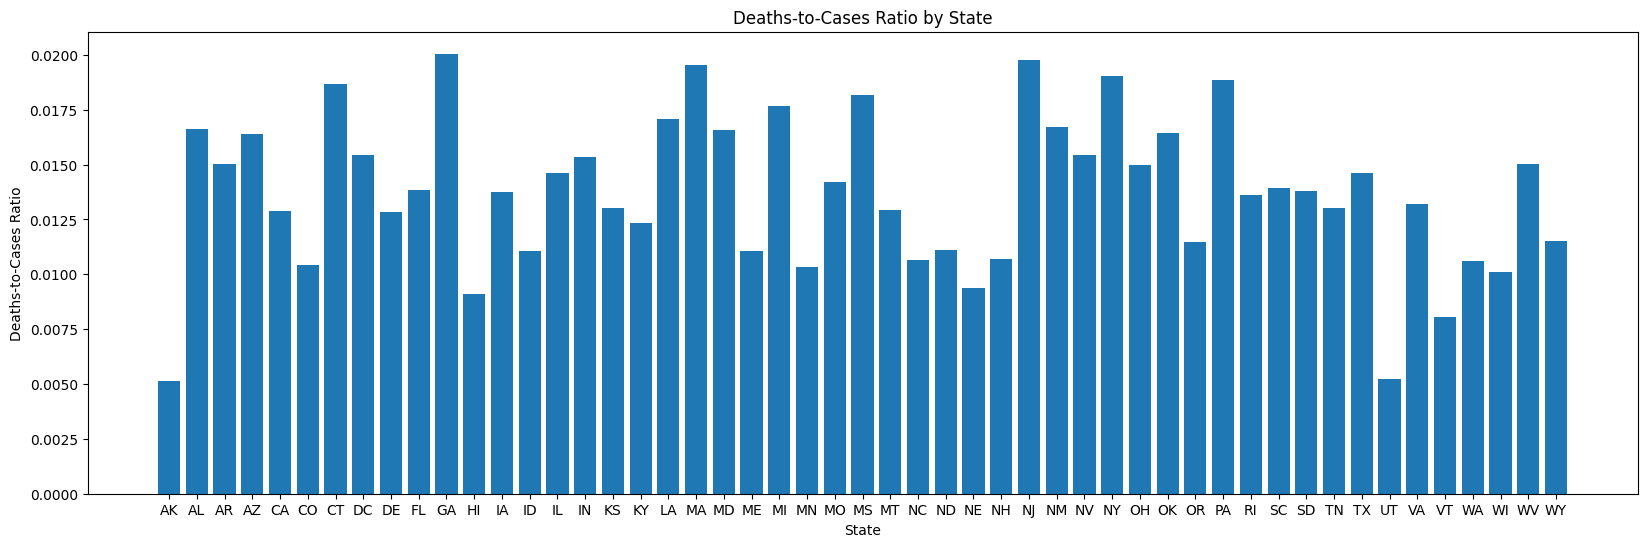

In [ ]:
#Calculating the ratio
merged_df['Deaths_to_Cases'] = merged_df['Deaths'] / merged_df['Cases']
deaths_cases_ratio = merged_df.groupby('State').mean()

plt.figure(figsize=(20, 6))
plt.bar(deaths_cases_ratio.index, deaths_cases_ratio['Deaths_to_Cases'])
plt.title('Deaths-to-Cases Ratio by State')
plt.xlabel('State')
plt.ylabel('Deaths-to-Cases Ratio')
plt.show()

6) Top 5 states

By adding up data grouped by state and arranging them in descending order, this algorithm determines the top 5 states with the highest overall number of COVID-19 deaths. The total number of deaths and cases in each state are then compared using a stacked bar chart, which shows a clear visual contrast with deaths at the bottom of each bar and cases at the top.

California, Texas, New York, Florida, and Pennsylvania have had a high number of COVID-19 cases and deaths due to their huge populations, urban density, and early virus epicenters, such as New York. State-specific rules, such as Florida's early reopening and Texas' uneven enforcement of prohibitions, contributed to the increase. Furthermore, these states experienced severe healthcare system strain, particularly during waves caused by highly transmissible variations. Population statistics, particularly among elderly people, increased sensitivity to severe outcomes.

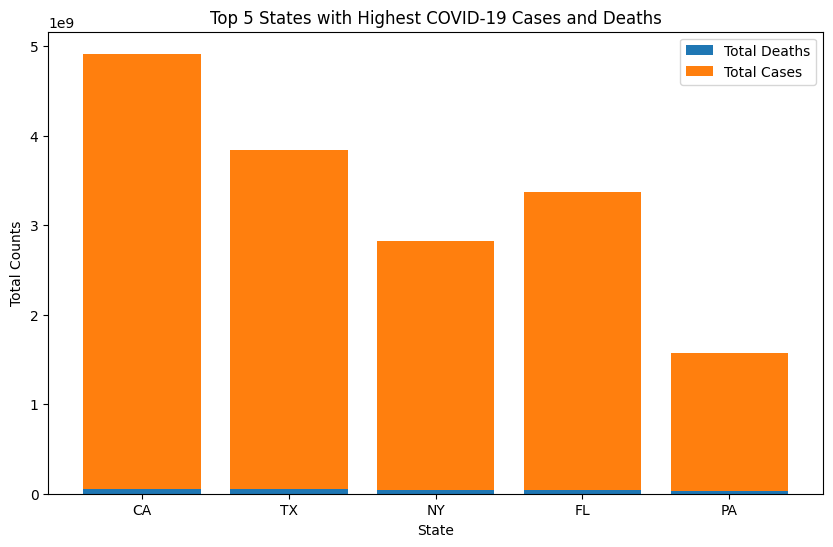

In [ ]:
top_states = merged_df.groupby('State').sum().nlargest(5, 'Deaths')

plt.figure(figsize=(10, 6))
plt.bar(top_states.index, top_states['Deaths'], label='Total Deaths')
plt.bar(top_states.index, top_states['Cases'], bottom=top_states['Deaths'], label='Total Cases')
plt.title('Top 5 States with Highest COVID-19 Cases and Deaths')
plt.xlabel('State')
plt.ylabel('Total Counts')
plt.legend()
plt.show()

7) Michigan C-D

This code calculates the logarithmic values of the 'Cases' and 'Deaths' columns in the MI_Cases_df and MI_Deaths_df DataFrames, respectively, to normalize the data and handle large values more effectively. It then plots a line graph comparing the log-transformed average monthly COVID-19 cases and deaths in Michigan from 2021 to 2022.

The blue line shows a steady increase in average monthly infections, peaking around late 2021 and early 2022, likely due to the Omicron variant, which caused widespread but generally less severe illness than Delta. The orange line also rises, but at a slower rate, reflecting improved treatments, widespread vaccination, and the less severe nature of Omicron. The widening gap between cases and deaths highlights the effectiveness of vaccines and treatments in reducing mortality despite the rise in infections.

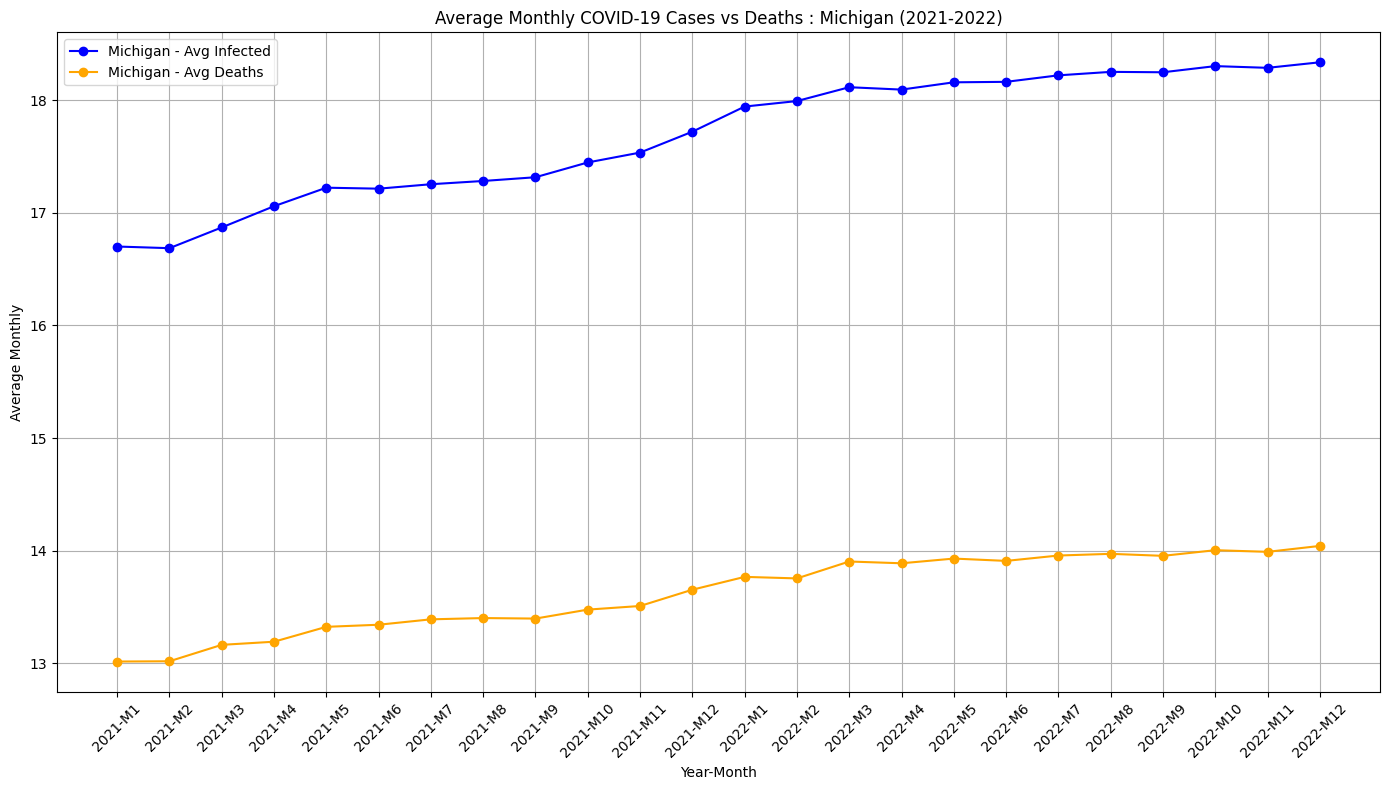

In [ ]:
MI_Cases_df['log_Cases']= np.log(MI_Cases_df.Cases)                               #Used the log version as Cases in M and Deaths in K
MI_Deaths_df['log_Deaths']= np.log(MI_Deaths_df.Deaths)
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(MI_Cases_df['Year-Month'], MI_Cases_df['log_Cases'], label='Michigan - Avg Infected', color='blue', marker='o')
plt.plot(MI_Deaths_df['Year-Month'], MI_Deaths_df['log_Deaths'], label='Michigan - Avg Deaths', color='orange', marker='o')

plt.title('Average Monthly COVID-19 Cases vs Deaths : Michigan (2021-2022)')
plt.xlabel('Year-Month')
plt.ylabel('Average Monthly')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
vacc_monthly.head(4)

,State,year,month,total_vaccinations
0,Alabama,2021,10,127049057.0
1,Alabama,2021,11,115914761.0
2,Alabama,2021,12,141436198.0
3,Alabama,2022,1,139950629.0


This code encodes to replace the Michigan to MI for the easy accessibility as the cases and deaths dataframe have abbrevations of the states and aggregating the total vaccinations by grouping using year and month.

In [ ]:
vacc_monthly['State'] = vacc_monthly['State'].replace('Michigan', 'MI')
MI_vacc = vacc_monthly[vacc_monthly['State'] == 'MI'].groupby(['year','month']).total_vaccinations.sum().reset_index()
MI_vacc['Year-Month'] = MI_vacc['year'].astype(str) + '-M' + MI_vacc['month'].astype(str)

In [ ]:
MI_Cases_df.head(4)

,year,month,Cases,Cases_per_capita,Year-Month,Region,log_Cases
0,2021,1,17900621,1790062.1,2021-M1,Michigan,16.700346
1,2021,2,17638997,1763899.7,2021-M2,Michigan,16.685623
2,2021,3,21206269,2120626.9,2021-M3,Michigan,16.869807
3,2021,4,25604473,2560447.3,2021-M4,Michigan,17.058278


In [ ]:
MI_vacc.head(4)

,year,month,total_vaccinations,Year-Month
0,2021,9,250448238.0,2021-M9
1,2021,10,223800186.0,2021-M10
2,2021,11,277393307.0,2021-M11
3,2021,12,348069580.0,2021-M12


Using the logarithmic transformation of the 'Cases' column in the MI_Cases_df DataFrame and the 'total_vaccinations' column in the MI_vacc DataFrame to handle large values, the code then combines the COVID-19 cases and vaccination data from the two datasets (MI_Cases_df and MI_vacc) on the 'year','month', and 'Year-Month' columns.

In [ ]:
MI_Cases_df['log_Cases']= np.log(MI_Cases_df.Cases)
MI_vacc['log_total_vaccinations']= np.log(MI_vacc.total_vaccinations)
Mi_Case_vacc = pd.merge(MI_Cases_df, MI_vacc, on=['year','month','Year-Month'], how='inner')
Mi_Case_vacc.head(4)

,year,month,Cases,Cases_per_capita,Year-Month,Region,log_Cases,total_vaccinations,log_total_vaccinations
0,2021,9,33112910,3311291.0,2021-M9,Michigan,17.315434,250448238.0,19.338763
1,2021,10,37760068,3776006.8,2021-M10,Michigan,17.446763,223800186.0,19.226264
2,2021,11,41215064,4121506.4,2021-M11,Michigan,17.534314,277393307.0,19.440947
3,2021,12,49614301,4961430.1,2021-M12,Michigan,17.719790,348069580.0,19.667913


8) MI - Infected Vs Vaccinations

The vaccination curve (orange), which represents early immunization efforts followed by a decline in demand, begins high, drops slightly in late 2021, stabilizes until mid-2022, and then declines. As new variation waves emerge, infections (blue) progressively increase with substantial peaks in late 2021 and early 2022. Although it was unable to completely stop infection surges, Michigan's more constant immunization rate did contribute to less severe cases.

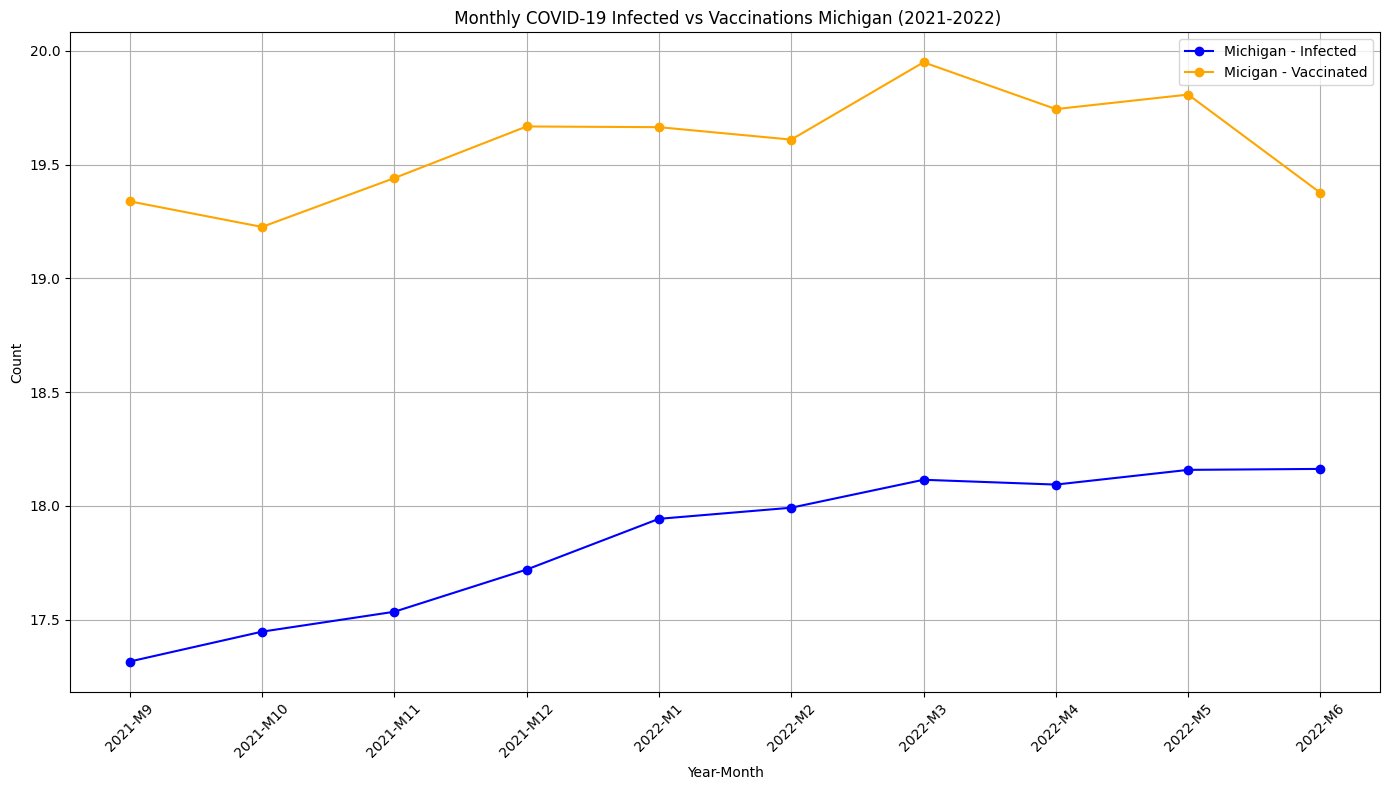

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(Mi_Case_vacc['Year-Month'], Mi_Case_vacc['log_Cases'], label='Michigan - Infected', color='blue', marker='o')
plt.plot(Mi_Case_vacc['Year-Month'], Mi_Case_vacc['log_total_vaccinations'], label='Micigan - Vaccinated', color='orange', marker='o')

plt.title(' Monthly COVID-19 Infected vs Vaccinations Michigan (2021-2022)')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
USA_vacc = vacc_monthly.groupby(['year', 'month']).total_vaccinations.sum().reset_index()
USA_vacc['Year-Month'] = USA_vacc['year'].astype(str) + '-M' + USA_vacc['month'].astype(str)
USA_vacc.head(4)

,year,month,total_vaccinations,Year-Month
0,2021,8,3.379716e+09,2021-M8
1,2021,9,1.819092e+10,2021-M9
2,2021,10,2.052539e+10,2021-M10
3,2021,11,1.760621e+10,2021-M11


In [ ]:
USA_Cases_df.head(4)

,year,month,Cases,Cases_per_capita,Year-Month,Region
0,2021,1,724340896,2.168685e+06,2021-M1,USA
1,2021,2,763591262,2.286201e+06,2021-M2,USA
2,2021,3,902051444,2.700753e+06,2021-M3,USA
3,2021,4,929252645,2.782194e+06,2021-M4,USA


The code applies a logarithmic transformation to the 'Cases' column in the USA_Cases_df DataFrame and the 'total_vaccinations' column in the USA_vacc DataFrame to reduce the scale of large values. It then merges the two datasets (USA_Cases_df and USA_vacc) on the 'year', 'month', and 'Year-Month' columns, aligning the COVID-19 cases and vaccination data for analysis.

In [ ]:
USA_Cases_df['log_Cases']= np.log(USA_Cases_df.Cases)
USA_vacc['log_total_vaccinations']= np.log(USA_vacc.total_vaccinations)
USA_Case_vacc = pd.merge(USA_Cases_df, USA_vacc, on=['year','month','Year-Month'], how='inner')

9) USA - Infected VS Vaccinations

The orange line depicts the monthly vaccination count, which peaks in August 2021, continues high, and then drops dramatically after May 2022, potentially due to vaccine saturation or decreased demand. Despite vaccine efforts, infection rates (blue) are constantly increasing, most likely due to variations like as Delta and Omicron. The disparity between rising infections and declining vaccination rates shows that the virus continued to propagate in vaccinated populations, possibly due to fading protection or immunological escape variations.

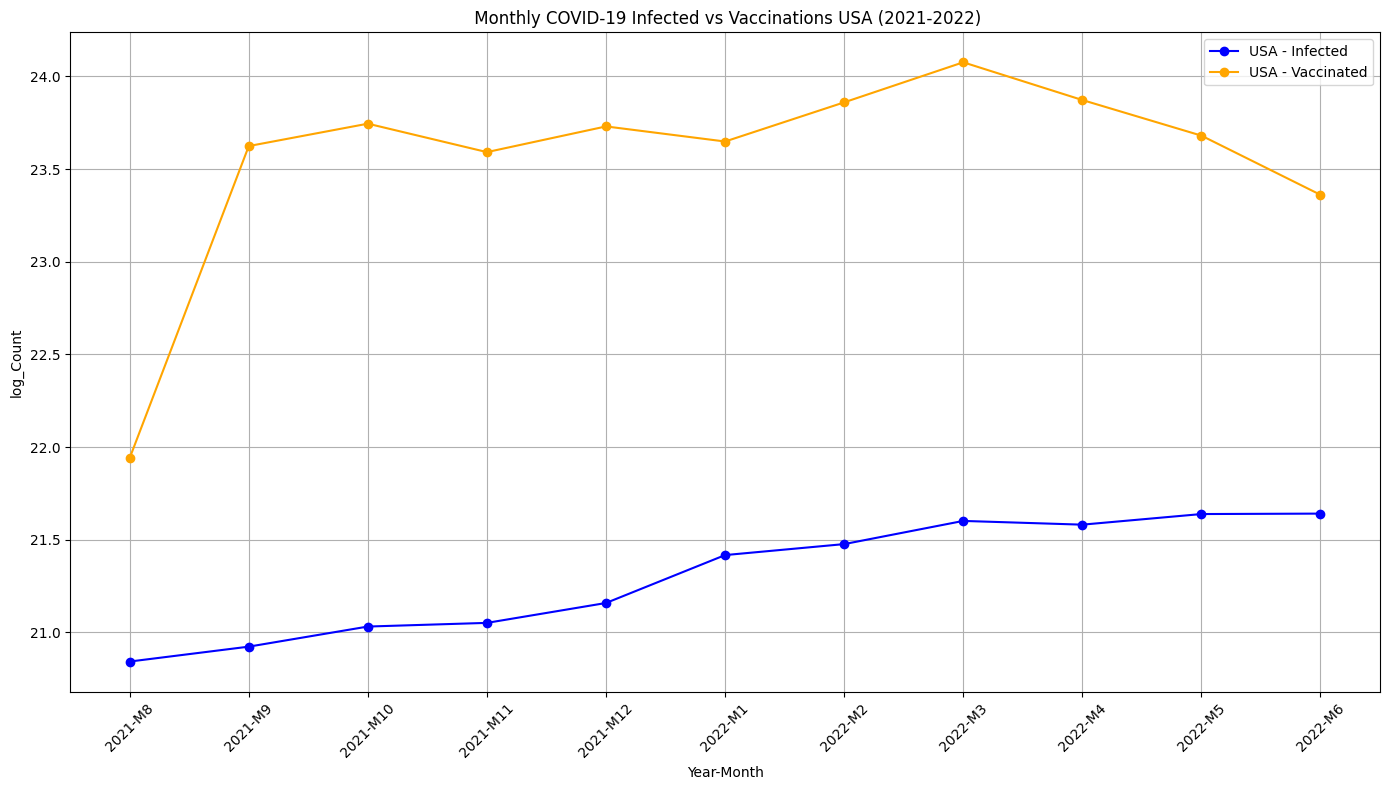

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(USA_Case_vacc['Year-Month'], USA_Case_vacc['log_Cases'], label='USA - Infected', color='blue', marker='o')
plt.plot(USA_Case_vacc['Year-Month'], USA_Case_vacc['log_total_vaccinations'], label='USA - Vaccinated', color='orange', marker='o')

plt.title(' Monthly COVID-19 Infected vs Vaccinations USA (2021-2022)')
plt.xlabel('Year-Month')
plt.ylabel('log_Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# **Sentimental Analysis**

In [ ]:
# Load vaccination dataset
file_path = '/content/us_state_vaccinations.csv'
vaccine_data = pd.read_csv(file_path)

In [ ]:
# Drop rows with missing values
series.dropna()
tweets_data.dropna()
vaccine_data = vaccine_data.dropna()

The code below ensures the date column in vaccine_data dataframe is properly formatted to a proper datetime format (YYYY-MM-DD). A year and week are are extracted from the date and new columns created for them. Thereafter, the columns are rearranged to prioritize location, date, year, and week at the beginning of the dataset. The same thing is applied to tweets_data dataframe in the next cell.

In [ ]:
# check the date column is in datetime format in vaccination dataset
vaccine_data['date'] = pd.to_datetime(vaccine_data['date'], format='%Y-%m-%d')

# Extract year and week
vaccine_data['year'] = vaccine_data['date'].dt.year
vaccine_data['week'] = vaccine_data['date'].dt.isocalendar().week
columns_order = ['location', 'date', 'year', 'week'] + [col for col in vaccine_data.columns if col not in ['location', 'date', 'year', 'week']]
vaccine_data = vaccine_data[columns_order]

# Display the updated DataFrame
vaccine_data.shape

<ipython-input-38-5f2601f77af0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-5f2601f77af0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-5f2601f77af0>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(13658, 18)

In [ ]:
#check the date column is in datetime format in tweets dataset
tweets_data['date'] = pd.to_datetime(tweets_data['date'], format='%d/%m/%Y')

# Extract year and week
tweets_data['year'] = tweets_data['date'].dt.year
tweets_data['week'] = tweets_data['date'].dt.isocalendar().week
# reorder the columns
columns_order = ['tweet_id', 'date', 'year', 'week'] + [col for col in tweets_data.columns if col not in ['tweet_id', 'date', 'year', 'week']]
tweets_data = tweets_data[columns_order]

tweets_data.head()

,tweet_id,date,year,week,username,tweet,location,hashtags,retweet_count,favorite_count,user_followers,user_following,sentiment,deaths,covid_phase
0,3298d4e9-7c1e-438b-884e-f73e8ad3bb03,2020-06-19,2020,25,smithjohn,Vaccine hesitancy among the population Mission...,Tennessee,#covid19,152,623,5563,4146,neutral,1878,Lockdown implementation
1,b95257cc-d698-4218-808e-3c2b55ca541e,2020-10-25,2020,43,luisvega,Getting vaccinated to protect ourselves and ot...,Colorado,#vaccine,487,660,6574,1899,neutral,1348,Post-lockdown recovery
2,5223d959-486e-4636-8681-ddb46ef30138,2021-12-23,2021,51,william81,Long COVID affecting many people Kind low gard...,North Dakota,#quarantine,256,226,5377,1367,negative,218,Vaccine rollout
3,bf288db2-cb53-4275-8465-3c142a4942c2,2020-06-02,2020,23,teresawashington,Lockdown measures to curb the pandemic Spring ...,Idaho,#vaccine,891,765,3247,972,neutral,703,Lockdown implementation
4,61aef52a-2993-4c80-adaa-19dbc1568e8b,2021-03-30,2021,13,patricia06,Impact of COVID-19 on the healthcare system Sc...,Oklahoma,#quarantine,545,790,2266,790,neutral,726,Vaccine development


The following code, groups the data in the vaccine_data dataset by year and week to give a summary of the data. It selects all the numerical fields in the dataset but removes year and week which is the basis of grouping and for this case should not be summed. It selects all the categorical columns in the dataset and date, year, week and location are excluded since they are not relevant to be aggregated. We have an aggregation dictionary which contains a set of rules for combining the Columns, whereby each numeric column is totalled for by year and week. For all the non-numeric fields the max value is taken. Thus, we create a new DataFrame vaccines_summary, which contains one record for each year-week.  


In [ ]:
# aggregare vaccine dataset
# Select only numeric columns for aggregation, excluding year and week
numeric_columns = vaccine_data.select_dtypes(include='number').columns
numeric_columns = numeric_columns[~numeric_columns.isin(['year', 'week'])]

# Select non-numeric columns
non_numeric_columns = vaccine_data.select_dtypes(exclude='number').columns.difference(['date', 'year', 'week','location'])

# Create aggregation dictionary
agg_dict = {col: 'sum' for col in numeric_columns}
agg_dict.update({col: 'max' for col in non_numeric_columns})

# Aggregate the data by year and week, applying sum for numeric and max for non-numeric columns
vaccines_summary = vaccine_data.groupby(['year', 'week']).agg(agg_dict).reset_index()

# Display the aggregated data
print(vaccines_summary.head())

   year  week  total_vaccinations  total_distributed  people_vaccinated  \
0  2021    34        2.019396e+09       2.415025e+09       1.116250e+09   
1  2021    35        4.097442e+09       4.913110e+09       2.260052e+09   
2  2021    36        3.503793e+09       4.219180e+09       1.925567e+09   
3  2021    37        4.950799e+09       5.990319e+09       2.714805e+09   
4  2021    38        4.921984e+09       5.958296e+09       2.689725e+09   

   people_fully_vaccinated_per_hundred  total_vaccinations_per_hundred  \
0                              7447.09                        15727.36   
1                             14992.09                        31697.08   
2                             13000.87                        27544.19   
3                             18704.99                        39581.35   
4                             18543.50                        39141.85   

   people_fully_vaccinated  people_vaccinated_per_hundred  \
0             9.481021e+08                 

The same approach used in aggregating the vaccine data dataset is applied in aggregating the tweets_data dataset. Although, when non-numeric columns are selected, the date, year, week and sentiment columns are excluded. The sentiment column is used to group the data alongside year and week.

In [ ]:
# aggregare tweets data set
# Select only numeric columns for aggregation
numeric_columns = tweets_data.select_dtypes(include='number').columns
numeric_columns = numeric_columns[~numeric_columns.isin(['year', 'week'])]

# Select non-numeric columns
non_numeric_columns = tweets_data.select_dtypes(exclude='number').columns.difference(['date', 'year', 'week','sentiment'])

# Create aggregation dictionary
agg_dict = {col: 'sum' for col in numeric_columns}
agg_dict.update({col: 'count' for col in non_numeric_columns})
tweets_summary = tweets_data.groupby(['year', 'week','sentiment']).agg(agg_dict).reset_index()

# Display the aggregated data
tweets_summary.head()

,year,week,sentiment,retweet_count,favorite_count,user_followers,user_following,deaths,covid_phase,hashtags,location,tweet,tweet_id,username
0,2020,1,negative,14318,14386,129307,60883,31332,28,28,28,28,28,28
1,2020,1,neutral,16299,18033,198461,98473,38407,35,35,35,35,35,35
2,2020,1,positive,25498,22204,204969,110477,39258,43,43,43,43,43,43
3,2020,2,negative,24592,24043,248111,148898,51408,54,54,54,54,54,54
4,2020,2,neutral,20030,17037,179909,116773,47519,40,40,40,40,40,40


The line of code below merges the vaccines_summary and tweets_summary datasets based on the shared columns year and week, keeping only rows where both datasets have matching values for these columns because we used inner join to join the two datasets

In [ ]:
# Merge the vaccines_summary and tweets_summary on year,week
combined_data = pd.merge(vaccines_summary, tweets_summary, on=['year','week'], how='inner')

# Display the combined data
print(combined_data.head())

   year  week  total_vaccinations  total_distributed  people_vaccinated  \
0  2021    34        2.019396e+09       2.415025e+09       1.116250e+09   
1  2021    34        2.019396e+09       2.415025e+09       1.116250e+09   
2  2021    34        2.019396e+09       2.415025e+09       1.116250e+09   
3  2021    35        4.097442e+09       4.913110e+09       2.260052e+09   
4  2021    35        4.097442e+09       4.913110e+09       2.260052e+09   

   people_fully_vaccinated_per_hundred  total_vaccinations_per_hundred  \
0                              7447.09                        15727.36   
1                              7447.09                        15727.36   
2                              7447.09                        15727.36   
3                             14992.09                        31697.08   
4                             14992.09                        31697.08   

   people_fully_vaccinated  people_vaccinated_per_hundred  \
0             9.481021e+08                 

The following lines of code, uses week and sentiment column to group the combined_data, then sums up the total number of tweets for each combination of week and sentiment category(neutral, positive, negative). It then resets the grouped data into a standard table format and displays the first few rows.

In [ ]:
# Group by week and sentiment to count occurrences
weekly_sentiment = combined_data.groupby(['week', 'sentiment']).agg({'tweet':'sum'}).reset_index()
weekly_sentiment.head()

,week,sentiment,tweet
0,34,negative,27
1,34,neutral,20
2,34,positive,20
3,35,negative,25
4,35,neutral,29


The following code sums up the tweet column to get the total number of tweets for each sentiment(positive, negative, neutral), renames it to tweet_sum, drops the week column from the view, resets index to create a standalone summary view.

In [ ]:
weekly_sentiment_sum = weekly_sentiment.groupby('sentiment').sum().reset_index().rename(columns = {'tweet': 'tweet_sum'})
weekly_sentiment_sum= weekly_sentiment_sum.drop(columns=['week'])
weekly_sentiment_sum.head()

,sentiment,tweet_sum
0,negative,408
1,neutral,421
2,positive,401


The code below merges weekly_sentiment with weekly_sentiment_sum using the sentiment column, which combines weekly data with total sentiment counts for further analysis.

In [ ]:
sentiments_data = pd.merge(weekly_sentiment, weekly_sentiment_sum, on='sentiment', how='inner')
sentiments_data.head()

,week,sentiment,tweet,tweet_sum
0,34,negative,27,408
1,34,neutral,20,421
2,34,positive,20,401
3,35,negative,25,408
4,35,neutral,29,421


The code below calculates the proportion of tweets for each sentiment in a specific week relative to the total tweets for that sentiment and stores it in a new column called ratio

In [ ]:
# create ratio column
sentiments_data['ratio'] = sentiments_data['tweet']/sentiments_data['tweet_sum']
sentiments_data.head()

,week,sentiment,tweet,tweet_sum,ratio
0,34,negative,27,408,0.066176
1,34,neutral,20,421,0.047506
2,34,positive,20,401,0.049875
3,35,negative,25,408,0.061275
4,35,neutral,29,421,0.068884


The code below groups the combined_data by sentiment, total vaccinations and week, sums the number of tweets for each sentiment category(neutral, positive, negative) create a summarized table by resetting the index.

In [ ]:
# Group by week, sentiment and total_vaccinations to count occurrences
weekly_vaccinations = combined_data.groupby(['week', 'sentiment', 'total_vaccinations']).agg({'tweet':'sum'}).reset_index()
weekly_vaccinations.head()

,week,sentiment,total_vaccinations,tweet
0,34,negative,2.019396e+09,27
1,34,neutral,2.019396e+09,20
2,34,positive,2.019396e+09,20
3,35,negative,4.097442e+09,25
4,35,neutral,4.097442e+09,29


In [ ]:
tweets_data.shape

(10000, 15)

The following lines of code uses plotly express to creates a grouped bar chart  that visualizes the ratio of tweets per the category of the sentiments which are neutral, positive and negative across all weeks.

The following are the chart observations.There was no significant positive or negative shifting for the weeks as most of the conversations followed the typical public discussion surrounding COVID-19 updates and policies, and the rollout of the vaccines. Positive sentiment rose towards year end by accomplishments in vaccination campaigns, holiday season, although it declined in week 52 due to Omicron variant, disruptions during the holiday travel season, and renewed restrictions. Mid-year content tone was mixed both by Delta variant fears and
vaccine hesitancy; despite the vaccination, early fall saw slightly negative content sentiment and then positive sentiment due to booster campaigns and New year celebrations.



In [ ]:
# plot the weekly sentiment using plotly
px.bar(sentiments_data, x='week', y='ratio', color='sentiment', barmode='group')

The code below uses rolling average to  smoothen out fluctuations in the weekly sentiment trends that is by reducing short-term fluctuations, making it easier to observe long-term trends.

As shown in the chart below, the sentiments softened in the vicinity of weeks 45–46 on uncertainty over Delta variant as well as winter months. The positive driver of sentiment was booster campaigns and optimistic holiday expectations, which were evident in weeks 47-50, but negativity due to Omicron, disruption in travel, and renewed restrictions surfaced in week 52.


In [ ]:
# Apply rolling average to smoothen the weekly data
sentiments_data['smoothed_ratio'] = sentiments_data['ratio'].rolling(10).mean()

# Plot the smoothed weekly sentiments
px.line(sentiments_data, x='week', y='smoothed_ratio', color='sentiment',
        title='Weekly Sentiment Trends',
        labels={'smoothed_ratio': 'Ratio', 'week': 'Week'},
        markers=True).show()

The observation gathered from the chart below is, the number of vaccinations tended to rise from week 34 through 44, as the fight against the Delta variant unfolded, while the number of tweets remained balanced due to the informative nature of the topics being factual. Positive text sentiment indeed reached its highest level during weeks 44 and 48–50, with the marked slowdown in vaccination growth in week 52 due to the holidays, the spread of Omicron, and the slow pace.


In [ ]:
# plot total vaccinations per week & show sentiment trends
px.bar(weekly_vaccinations, x='week', y='total_vaccinations', color='sentiment', barmode='group')

The following are the observations in the chart below. Slightly more of the tweets were neutral, which would suggest most of the tweets were strictly and purely informative regarding COVID-19 without much opinion or emotion. The positive and negative sentiments were almost balanced, the positivity was around the vaccination roll outs while negativity was observed around new variants of COVID and new lock downs restrictions.


In [ ]:
# Group by sentiment to get total tweet count for each sentiment
sentiment_summary = sentiments_data.groupby('sentiment', as_index=False)['tweet'].sum()
# bar chart to show sentiment distribution in tweets
fig = px.bar(sentiment_summary,
             x='sentiment',
             y='tweet',
             color='sentiment',
             title='Sentiment Distribution in Tweets',
             labels={'sentiment': 'Sentiment', 'tweet': 'Number of Tweets'})
fig.show()

When it comes to the word cloud of COVID-19 captured in the figure below, key areas of discussions involving health and economics can be noted with the help of such leading terms as virus, pandemic, and economy that points at the main concerns and challenges of public health. Vaccination hesitancy and other new variants, social and lifestyle changes continue to persist and stake evidence of the ever-encompassing impact of the pandemic.

14) Word cloud for tweets

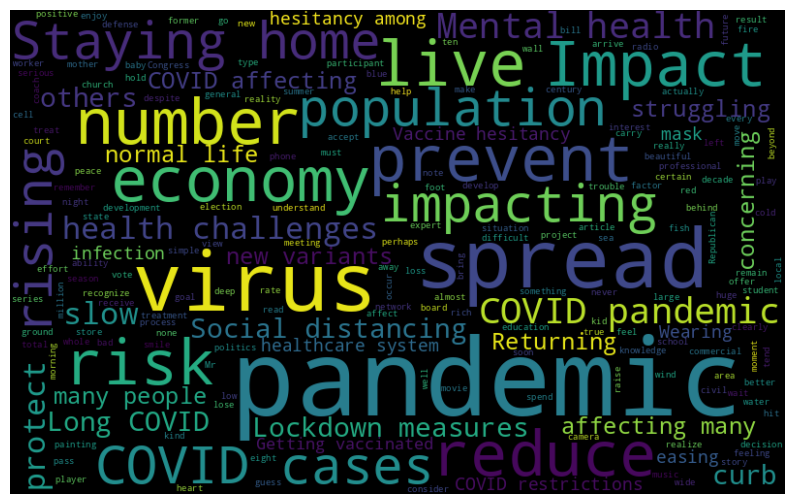

In [ ]:
# Generate word cloud for tweets
text = " ".join(review for review in tweets_data.tweet.astype(str))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()